In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pyecharts.charts import Bar, Pie, Line, WordCloud
from pyecharts import options as opts
from collections import Counter
# 设置中文字体以正确显示中文
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
mpl.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


In [26]:
#读取数据
df = pd.read_excel("豆瓣电影数据集5000.xlsx")
df

,电影名称,评分,评价人数,5星人数,短评数量,影评数量,类型,导演,编剧,主演,制片国家/地区,上映日期,片长,剧情简介,总分（评分×评价人数）
0,肖申克的救赎 The Shawshank Redemption,9.6,1353097,84.1%,265551,7530,剧情/犯罪,弗兰克·德拉邦特,弗兰克·德拉邦特/斯蒂芬·金,蒂姆·罗宾斯/摩根·弗里曼/鲍勃·冈顿/威廉姆·赛德勒/克兰西·布朗/吉尔·贝罗斯/马克·罗...,美国,1994-09-10(多伦多电影节)/1994-10-14(美国),142.0,20世纪40年代末，小有成就的青年银行家安迪（蒂姆·罗宾斯TimRobbins饰）因涉嫌杀害...,12989731.2
1,这个杀手不太冷 Léon,9.4,1226642,74.1%,224430,4421,剧情/动作/犯罪,吕克·贝松,吕克·贝松,让·雷诺/娜塔莉·波特曼/加里·奥德曼/丹尼·爱罗/彼得·阿佩尔/迈克尔·巴达鲁科/艾伦·格...,法国,1994-09-14(法国),110.0,里昂（让·雷诺饰）是名孤独的职业杀手，受人雇佣。一天，邻居家小姑娘马蒂尔达（纳塔丽·波特曼饰...,11530434.8
2,阿甘正传 Forrest Gump,9.4,1059710,75.5%,175071,3847,剧情/爱情,罗伯特·泽米吉斯,艾瑞克·罗斯/Winston Groom,汤姆·汉克斯/罗宾·怀特/加里·西尼斯/麦凯尔泰·威廉逊/莎莉·菲尔德/海利·乔·奥斯蒙/迈...,美国,1994-06-23(洛杉矶首映)/1994-07-06(美国),142.0,阿甘（汤姆·汉克斯饰）于二战结束后不久出生在美国南方阿拉巴马州一个闭塞的小镇，他先天弱智，智...,9961274.0
3,盗梦空间 Inception,9.3,1065943,69.7%,219175,5372,剧情/科幻/悬疑/冒险,克里斯托弗·诺兰,克里斯托弗·诺兰,莱昂纳多·迪卡普里奥/约瑟夫·高登-莱维特/艾伦·佩吉/汤姆·哈迪/渡边谦/迪利普·劳/基里...,美国 / 英国,2010-09-01(中国大陆)/2010-07-16(美国),148.0,道姆·柯布（莱昂纳多·迪卡普里奥LeonardoDiCaprio饰）与同事阿瑟（约瑟夫·戈登...,9913269.9
4,霸王别姬,9.6,993975,81.3%,214889,6228,剧情/爱情/同性,陈凯歌,芦苇/李碧华,张国荣/张丰毅/巩俐/葛优/英达/蒋雯丽/吴大维/吕齐/雷汉/尹治/马明威/费振翔/智一桐/...,中国大陆 / 香港,1993-01-01(香港),171.0,段小楼（张丰毅）与程蝶衣（张国荣）是一对打小一起长大的师兄弟，两人一个演生，一个饰旦，一向配...,9542160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,邋遢大王奇遇记,8.2,7700,33.9%,1373,27,动画/儿童,钱运达,凌纾,范楚绒/谢添天/罗玉婷/王肖兵/符冲,中国大陆,2012-08-17(中国大陆),86.0,这是一个脏孩子有趣而惊险的梦。他带我们见识了潜伏在古墓中丑陋可怕的老鼠王国，那些形形色色具有...,63140.0
4995,美国情人 Mistress America,7.2,8769,13.6%,2813,48,喜剧,诺亚·鲍姆巴赫,诺亚·鲍姆巴赫/格蕾塔·葛韦格,格蕾塔·葛韦格/罗拉·科克/希瑟·林德/张欣迪/迈克尔·切鲁斯/塞斯·帕里什/朱丽叶·布雷特...,美国,2015-08-14(美国),84.0,特雷西（萝拉·科克LolaKirke饰）是一名平凡的女大学生，落在人群之中毫不起眼。一成不变...,63136.8
4996,人皮客栈3 Hostel: Part III,5.4,11692,3.9%,2724,30,恐怖,斯科特·斯皮格尔,John Fasano/伊莱·罗斯,布莱恩·哈利塞 Brian Hallisay/约翰·亨斯利/琦普·帕杜,美国,2011-12,88.0,四个朋友斯科特（布莱恩·哈利塞BrianHallisay饰）、卡特（琦普·帕杜KipPard...,63136.8
4997,西小河的夏天,6.8,9283,8.3%,3564,179,剧情/家庭,周全,黄怡玫,张颂文/谭卓/顾宝明/董晴/荣梓杉,中国大陆,2018-05-25(中国大陆)/2017-10-14(釜山电影节),102.0,1998年夏，皮耶罗决战世界杯，10岁的晓阳也想像他一样。当老师的爸爸拒绝为他的校队申请书签...,63124.4


In [3]:
# 查看前几行数据
df.head(5)


,电影名称,评分,评价人数,5星人数,短评数量,影评数量,类型,导演,编剧,主演,制片国家/地区,上映日期,片长,剧情简介,总分（评分×评价人数）
0,肖申克的救赎 The Shawshank Redemption,9.6,1353097,84.1%,265551,7530,剧情/犯罪,弗兰克·德拉邦特,弗兰克·德拉邦特/斯蒂芬·金,蒂姆·罗宾斯/摩根·弗里曼/鲍勃·冈顿/威廉姆·赛德勒/克兰西·布朗/吉尔·贝罗斯/马克·罗...,美国,1994-09-10(多伦多电影节)/1994-10-14(美国),142.0,20世纪40年代末，小有成就的青年银行家安迪（蒂姆·罗宾斯TimRobbins饰）因涉嫌杀害...,12989731.2
1,这个杀手不太冷 Léon,9.4,1226642,74.1%,224430,4421,剧情/动作/犯罪,吕克·贝松,吕克·贝松,让·雷诺/娜塔莉·波特曼/加里·奥德曼/丹尼·爱罗/彼得·阿佩尔/迈克尔·巴达鲁科/艾伦·格...,法国,1994-09-14(法国),110.0,里昂（让·雷诺饰）是名孤独的职业杀手，受人雇佣。一天，邻居家小姑娘马蒂尔达（纳塔丽·波特曼饰...,11530434.8
2,阿甘正传 Forrest Gump,9.4,1059710,75.5%,175071,3847,剧情/爱情,罗伯特·泽米吉斯,艾瑞克·罗斯/Winston Groom,汤姆·汉克斯/罗宾·怀特/加里·西尼斯/麦凯尔泰·威廉逊/莎莉·菲尔德/海利·乔·奥斯蒙/迈...,美国,1994-06-23(洛杉矶首映)/1994-07-06(美国),142.0,阿甘（汤姆·汉克斯饰）于二战结束后不久出生在美国南方阿拉巴马州一个闭塞的小镇，他先天弱智，智...,9961274.0
3,盗梦空间 Inception,9.3,1065943,69.7%,219175,5372,剧情/科幻/悬疑/冒险,克里斯托弗·诺兰,克里斯托弗·诺兰,莱昂纳多·迪卡普里奥/约瑟夫·高登-莱维特/艾伦·佩吉/汤姆·哈迪/渡边谦/迪利普·劳/基里...,美国 / 英国,2010-09-01(中国大陆)/2010-07-16(美国),148.0,道姆·柯布（莱昂纳多·迪卡普里奥LeonardoDiCaprio饰）与同事阿瑟（约瑟夫·戈登...,9913269.9
4,霸王别姬,9.6,993975,81.3%,214889,6228,剧情/爱情/同性,陈凯歌,芦苇/李碧华,张国荣/张丰毅/巩俐/葛优/英达/蒋雯丽/吴大维/吕齐/雷汉/尹治/马明威/费振翔/智一桐/...,中国大陆 / 香港,1993-01-01(香港),171.0,段小楼（张丰毅）与程蝶衣（张国荣）是一对打小一起长大的师兄弟，两人一个演生，一个饰旦，一向配...,9542160.0


In [4]:
# 查看后几行数据
df.tail(5)

,电影名称,评分,评价人数,5星人数,短评数量,影评数量,类型,导演,编剧,主演,制片国家/地区,上映日期,片长,剧情简介,总分（评分×评价人数）
4994,邋遢大王奇遇记,8.2,7700,33.9%,1373,27,动画/儿童,钱运达,凌纾,范楚绒/谢添天/罗玉婷/王肖兵/符冲,中国大陆,2012-08-17(中国大陆),86.0,这是一个脏孩子有趣而惊险的梦。他带我们见识了潜伏在古墓中丑陋可怕的老鼠王国，那些形形色色具有...,63140.0
4995,美国情人 Mistress America,7.2,8769,13.6%,2813,48,喜剧,诺亚·鲍姆巴赫,诺亚·鲍姆巴赫/格蕾塔·葛韦格,格蕾塔·葛韦格/罗拉·科克/希瑟·林德/张欣迪/迈克尔·切鲁斯/塞斯·帕里什/朱丽叶·布雷特...,美国,2015-08-14(美国),84.0,特雷西（萝拉·科克LolaKirke饰）是一名平凡的女大学生，落在人群之中毫不起眼。一成不变...,63136.8
4996,人皮客栈3 Hostel: Part III,5.4,11692,3.9%,2724,30,恐怖,斯科特·斯皮格尔,John Fasano/伊莱·罗斯,布莱恩·哈利塞 Brian Hallisay/约翰·亨斯利/琦普·帕杜,美国,2011-12,88.0,四个朋友斯科特（布莱恩·哈利塞BrianHallisay饰）、卡特（琦普·帕杜KipPard...,63136.8
4997,西小河的夏天,6.8,9283,8.3%,3564,179,剧情/家庭,周全,黄怡玫,张颂文/谭卓/顾宝明/董晴/荣梓杉,中国大陆,2018-05-25(中国大陆)/2017-10-14(釜山电影节),102.0,1998年夏，皮耶罗决战世界杯，10岁的晓阳也想像他一样。当老师的爸爸拒绝为他的校队申请书签...,63124.4
4998,在某处 Somewhere,6.5,9710,8.5%,3206,118,剧情,索菲亚·科波拉,索菲亚·科波拉,艾丽·范宁/斯蒂芬·多尔夫/米歇尔·莫纳汉/本尼西奥·德尔·托罗/罗伯特·舒瓦兹曼,美国 / 英国 / 意大利 / 日本,2010-09-03(威尼斯电影节)/2011-01-21(美国),97.0,好莱坞著名的男明星约翰尼（斯蒂芬·多尔夫StephenDorff饰）是一个终日与酒色作伴的浪...,63115.0


In [5]:
# 查看随机5行数据
df.sample(5)


,电影名称,评分,评价人数,5星人数,短评数量,影评数量,类型,导演,编剧,主演,制片国家/地区,上映日期,片长,剧情简介,总分（评分×评价人数）
2033,白雪公主之魔镜魔镜 Mirror Mirror,5.9,49149,4.7%,16586,182,剧情/喜剧/奇幻/冒险,塔西姆·辛,雅各布·格林/威廉·格林/梅丽莎·沃雷克/贾森·凯勒,朱莉娅·罗伯茨/莉莉·柯林斯/艾米·汉莫/内森·连恩/肖恩·宾/梅尔·温宁汉姆/迈克尔·勒纳,美国,2012-06-01(中国大陆)/2012-03-30(美国),106.0,影片讲述了由朱莉娅·罗伯茨主演的邪恶的皇后窃取了国家的政权，而被流放的公主在七个足智多谋的小...,289979.1
3570,三城记,6.1,19167,6.0%,5600,143,剧情/爱情,张婉婷,张婉婷/罗启锐,刘青云/汤唯/秦海璐/井柏然/黄觉/金燕玲/李建义/焦刚/陈欣健,中国大陆 / 香港,2015-08-27(中国大陆),130.0,在那个动荡的四、五十年代，爱情绝对得来不易——一件订情信物、一首情歌、一个约定都足以令恋人魂...,116918.7
2086,愤怒的公牛 Raging Bull,8.4,33168,36.9%,5718,139,剧情/传记/运动,马丁·斯科塞斯,马丁·斯科塞斯/保罗·施拉德,罗伯特·德尼罗/凯西·莫拉蒂/乔·佩西/弗兰克·文森特/特雷萨·萨尔达娜/尼可拉斯·科拉山多...,美国,1980-11-14,129.0,杰克•拉莫塔（罗伯特•德尼罗RobertDeNiro饰）出身于纽约的布鲁克林区。自小便进行拳...,278611.2
647,怪物史瑞克 Shrek,7.9,139439,21.5%,10635,121,喜剧/动画/家庭/奇幻/冒险,安德鲁·亚当森,威廉·史塔克/泰德·艾略特/特里·鲁西奥/乔·斯蒂尔曼/罗杰·S·H·舒尔曼/科迪·卡梅伦/...,麦克·梅尔斯/艾迪·墨菲/卡梅隆·迪亚兹/约翰·利思戈/文森特·卡索/皮特·丹尼斯/克莱夫·...,美国,2001-05-18(美国),90.0,史莱克生活在平凡的世界中——他本身是一个其貌不扬的怪物，绿色的身体，古怪的脾气，不爱干净的懒...,1101568.1
2500,花容月貌 Jeune & Jolie,7.4,28528,14.5%,7840,142,剧情,弗朗索瓦·欧容,弗朗索瓦·欧容,玛丽恩·瓦科特/热拉尔丁娜·帕亚/弗雷德里克·皮耶罗/方丹·拉瓦特/约翰·雷森/夏洛特·兰普...,法国,2013-08-21(法国),95.0,伊莎贝尔（玛丽恩·瓦斯MarineVacth饰）是一名17岁的妙龄女孩，拥有着靓丽容貌和美好...,211107.2


In [27]:
# 查看数据基本信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   电影名称         4999 non-null   object 
 1   评分           4999 non-null   float64
 2   评价人数         4999 non-null   int64  
 3   5星人数         4999 non-null   object 
 4   短评数量         4999 non-null   int64  
 5   影评数量         4999 non-null   int64  
 6   类型           4999 non-null   object 
 7   导演           4999 non-null   object 
 8   编剧           4996 non-null   object 
 9   主演           4996 non-null   object 
 10  制片国家/地区      4999 non-null   object 
 11  上映日期         4995 non-null   object 
 12  片长           4989 non-null   float64
 13  剧情简介         4993 non-null   object 
 14  总分（评分×评价人数）  4999 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 585.9+ KB


In [29]:
# 去除重复值
df = df.drop_duplicates()
df.sample(5)

,电影名称,评分,评价人数,5星人数,短评数量,影评数量,类型,导演,编剧,主演,制片国家/地区,上映日期,片长,剧情简介,总分（评分×评价人数）
3258,赌侠1999,6.6,20545,6.5%,1603,10,喜剧,王晶,王晶,刘德华/朱茵/张家辉/高捷/张慧仪/张锦程/李子雄/吴毅将/吴志雄/黄子扬/林尚义/李兆基,香港,1998-12-18,112.0,阿king（刘德华饰）当年因出千被捕，事实上他是被人陷害的。出狱时他为他接风的是崇拜他已久的...,135597.0
4059,足迹 Sleuth,7.5,12494,19.3%,2913,107,剧情/悬疑/惊悚,肯尼思·布拉纳,哈罗德·品特,迈克尔·凯恩/裘德·洛/哈罗德·品特/Carmel O'Sullivan/肯尼思·布拉纳,美国,2007-10-12,86.0,这是一部关于两个男人的战争。一个失意的演员，成为了一个兼职发型师（裘德洛饰），作为一个婚姻破...,93705.0
2815,第一滴血3 Rambo III,7.5,23417,16.9%,1756,23,动作/惊悚/冒险,彼得·麦克唐纳德,大卫·莫瑞尔/西尔维斯特·史泰龙/谢尔登 莱提奇,西尔维斯特·史泰龙/理查德·克里纳/马克德容/柯特伍德·史密斯/Spiros Focás/S...,美国,1988-05-25(美国),102.0,历经无数战火与生死考验，孔武有力的豪情勇士约翰·兰博（西尔维斯特·史泰龙SylvesterS...,175627.5
2340,斯诺登 Snowden,7.6,31121,16.8%,7914,132,剧情/惊悚/传记,奥利佛·斯通,基兰·菲茨杰拉德/奥利佛·斯通/卢克·哈丁/安纳托利·库齐利纳,约瑟夫·高登-莱维特/谢琳·伍德蕾/梅丽莎·里奥/扎克瑞·昆图/汤姆·威尔金森/瑞斯·伊凡斯...,美国 / 德国,2016-09-09(多伦多电影节)/2016-09-16(美国),134.0,斯诺登2004年应征入伍、后被派遣到伊拉克战场，因不幸在训练时双腿受伤，斯诺登退役回国后应聘...,236519.6
2033,白雪公主之魔镜魔镜 Mirror Mirror,5.9,49149,4.7%,16586,182,剧情/喜剧/奇幻/冒险,塔西姆·辛,雅各布·格林/威廉·格林/梅丽莎·沃雷克/贾森·凯勒,朱莉娅·罗伯茨/莉莉·柯林斯/艾米·汉莫/内森·连恩/肖恩·宾/梅尔·温宁汉姆/迈克尔·勒纳,美国,2012-06-01(中国大陆)/2012-03-30(美国),106.0,影片讲述了由朱莉娅·罗伯茨主演的邪恶的皇后窃取了国家的政权，而被流放的公主在七个足智多谋的小...,289979.1


In [33]:
# 筛选符合条件的行
# 查看"城市"为"制片国家/地区"的行
r=df.loc[df['制片国家/地区'] == '中国', :]
r
# 筛选"城市"为"制片国家/地区"，并且“类型”为“剧情”的数据
r= df.loc[(df['制片国家/地区'] == '中国') & (df['类型'] == '剧情'), :]
r

,电影名称,评分,评价人数,5星人数,短评数量,影评数量,类型,导演,编剧,主演,制片国家/地区,上映日期,片长,剧情简介,总分（评分×评价人数）
3560,我叫刘跃进,6.4,18371,4.9%,2101,198,剧情,马俪文,刘震云,李易祥/刘信义/刘桦/秦海璐/陈瑾/丁志城,中国,2008-01-18,85.0,在工地上做厨子的民工刘跃进（李易祥饰）人生的奋斗目标便是在北京赚点钱，回老家开一家小饭馆。有...,117574.4
3972,走着瞧,7.6,12778,16.2%,3053,104,剧情,李大为,述平,文章/岳红/白静,中国,2009-05-13,100.0,七十年代，城市知青马杰（文章饰）来到西北某农村插队，被村里漂亮种驴——黑六的叫声吸引。马杰嫌...,97112.8


In [34]:
# 复制数据集
data=df.copy()
data

,电影名称,评分,评价人数,5星人数,短评数量,影评数量,类型,导演,编剧,主演,制片国家/地区,上映日期,片长,剧情简介,总分（评分×评价人数）
0,肖申克的救赎 The Shawshank Redemption,9.6,1353097,84.1%,265551,7530,剧情/犯罪,弗兰克·德拉邦特,弗兰克·德拉邦特/斯蒂芬·金,蒂姆·罗宾斯/摩根·弗里曼/鲍勃·冈顿/威廉姆·赛德勒/克兰西·布朗/吉尔·贝罗斯/马克·罗...,美国,1994-09-10(多伦多电影节)/1994-10-14(美国),142.0,20世纪40年代末，小有成就的青年银行家安迪（蒂姆·罗宾斯TimRobbins饰）因涉嫌杀害...,12989731.2
1,这个杀手不太冷 Léon,9.4,1226642,74.1%,224430,4421,剧情/动作/犯罪,吕克·贝松,吕克·贝松,让·雷诺/娜塔莉·波特曼/加里·奥德曼/丹尼·爱罗/彼得·阿佩尔/迈克尔·巴达鲁科/艾伦·格...,法国,1994-09-14(法国),110.0,里昂（让·雷诺饰）是名孤独的职业杀手，受人雇佣。一天，邻居家小姑娘马蒂尔达（纳塔丽·波特曼饰...,11530434.8
2,阿甘正传 Forrest Gump,9.4,1059710,75.5%,175071,3847,剧情/爱情,罗伯特·泽米吉斯,艾瑞克·罗斯/Winston Groom,汤姆·汉克斯/罗宾·怀特/加里·西尼斯/麦凯尔泰·威廉逊/莎莉·菲尔德/海利·乔·奥斯蒙/迈...,美国,1994-06-23(洛杉矶首映)/1994-07-06(美国),142.0,阿甘（汤姆·汉克斯饰）于二战结束后不久出生在美国南方阿拉巴马州一个闭塞的小镇，他先天弱智，智...,9961274.0
3,盗梦空间 Inception,9.3,1065943,69.7%,219175,5372,剧情/科幻/悬疑/冒险,克里斯托弗·诺兰,克里斯托弗·诺兰,莱昂纳多·迪卡普里奥/约瑟夫·高登-莱维特/艾伦·佩吉/汤姆·哈迪/渡边谦/迪利普·劳/基里...,美国 / 英国,2010-09-01(中国大陆)/2010-07-16(美国),148.0,道姆·柯布（莱昂纳多·迪卡普里奥LeonardoDiCaprio饰）与同事阿瑟（约瑟夫·戈登...,9913269.9
4,霸王别姬,9.6,993975,81.3%,214889,6228,剧情/爱情/同性,陈凯歌,芦苇/李碧华,张国荣/张丰毅/巩俐/葛优/英达/蒋雯丽/吴大维/吕齐/雷汉/尹治/马明威/费振翔/智一桐/...,中国大陆 / 香港,1993-01-01(香港),171.0,段小楼（张丰毅）与程蝶衣（张国荣）是一对打小一起长大的师兄弟，两人一个演生，一个饰旦，一向配...,9542160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,邋遢大王奇遇记,8.2,7700,33.9%,1373,27,动画/儿童,钱运达,凌纾,范楚绒/谢添天/罗玉婷/王肖兵/符冲,中国大陆,2012-08-17(中国大陆),86.0,这是一个脏孩子有趣而惊险的梦。他带我们见识了潜伏在古墓中丑陋可怕的老鼠王国，那些形形色色具有...,63140.0
4995,美国情人 Mistress America,7.2,8769,13.6%,2813,48,喜剧,诺亚·鲍姆巴赫,诺亚·鲍姆巴赫/格蕾塔·葛韦格,格蕾塔·葛韦格/罗拉·科克/希瑟·林德/张欣迪/迈克尔·切鲁斯/塞斯·帕里什/朱丽叶·布雷特...,美国,2015-08-14(美国),84.0,特雷西（萝拉·科克LolaKirke饰）是一名平凡的女大学生，落在人群之中毫不起眼。一成不变...,63136.8
4996,人皮客栈3 Hostel: Part III,5.4,11692,3.9%,2724,30,恐怖,斯科特·斯皮格尔,John Fasano/伊莱·罗斯,布莱恩·哈利塞 Brian Hallisay/约翰·亨斯利/琦普·帕杜,美国,2011-12,88.0,四个朋友斯科特（布莱恩·哈利塞BrianHallisay饰）、卡特（琦普·帕杜KipPard...,63136.8
4997,西小河的夏天,6.8,9283,8.3%,3564,179,剧情/家庭,周全,黄怡玫,张颂文/谭卓/顾宝明/董晴/荣梓杉,中国大陆,2018-05-25(中国大陆)/2017-10-14(釜山电影节),102.0,1998年夏，皮耶罗决战世界杯，10岁的晓阳也想像他一样。当老师的爸爸拒绝为他的校队申请书签...,63124.4


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   电影名称         4999 non-null   object 
 1   评分           4999 non-null   float64
 2   评价人数         4999 non-null   int64  
 3   5星人数         4999 non-null   object 
 4   短评数量         4999 non-null   int64  
 5   影评数量         4999 non-null   int64  
 6   类型           4999 non-null   object 
 7   导演           4999 non-null   object 
 8   编剧           4996 non-null   object 
 9   主演           4996 non-null   object 
 10  制片国家/地区      4999 non-null   object 
 11  上映日期         4995 non-null   object 
 12  片长           4989 non-null   float64
 13  剧情简介         4993 non-null   object 
 14  总分（评分×评价人数）  4999 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 585.9+ KB


In [38]:
#统计各列空值的数量
data.isnull().sum()

电影名称            0
评分              0
评价人数            0
5星人数            0
短评数量            0
影评数量            0
类型              0
导演              0
编剧              3
主演              3
制片国家/地区         0
上映日期            4
片长             10
剧情简介            6
总分（评分×评价人数）     0
dtype: int64

In [39]:
# （4）“星级”列空值用“未知”补充，直接修改原数据
# step1：查看“星级”列数据，确认数据为NaN
data["片长"]
# step2：空值用“未知”补充，提示：.fillna("未知",inplace = True)  # inplace=True  直接修改原DataFrame（df），而非返回一个新的DataFrame。
data["片长"].fillna("未知",inplace = True)
# # step3：确认数据补充完毕
data.sample(5)

C:\Users\86155\AppData\Local\Temp\ipykernel_39632\1684194517.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '未知' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data["片长"].fillna("未知",inplace = True)


,电影名称,评分,评价人数,5星人数,短评数量,影评数量,类型,导演,编剧,主演,制片国家/地区,上映日期,片长,剧情简介,总分（评分×评价人数）
3577,追爱大布局 愛情無全順,5.9,19765,5.2%,5409,69,喜剧/爱情,赖俊羽,李佳颖/苏照彬,陈柏霖/陈意涵/郭书瑶/姜康哲/安唯绫/张少怀/潘慧如/瞿友宁/张本渝/王静莹/聂云/郑家纯...,台湾,2014-04-15(中国大陆)/2013-12-06(台湾),101.0,校花梁小琪（陈意涵饰）是众宅男心中的女神，她的男友张圣（姜康哲饰）更是校园中叱咤风云的人物，...,116613.5
1055,青春派,7.4,90123,17.5%,24447,637,剧情/爱情,刘杰,刘杰/高山/朱珠/田晓威,董子健/秦海璐/咏梅/焦刚/安悦溪/郄路通/蒋雪鸣/高浩元/谭楚枫/李天浩/蒋小涵/侯孝贤/龙然,中国大陆,2013-08-02(中国大陆),91.0,不疯狂，怎叫青春？居然（董子健饰）在高考前拍毕业照时，当着全校师生的面，大声地用泰戈尔的诗句...,666910.2
2724,越狱特别篇：最后一越 Prison Break: The Final Break,7.9,23211,29.1%,3111,64,剧情/动作/惊悚,凯文·霍克斯,保罗·舒尔灵/尼克·桑多拉/Seth Hoffman/Zack Estrin/Karyn U...,多米尼克·珀塞尔/温特沃斯·米勒/阿莫里·诺拉斯科/罗伯特·克耐普/乔迪·琳·欧基菲/莎拉·...,美国,2009-05-26,89.0,《最后一越》将讲述众人在《越狱》正剧最后的大结局忽略掉的四年之间发生的事。,183366.9
4323,共助 공조,6.9,11989,11.9%,3652,45,动作,金成勋,尹贤浩,玄彬/柳海真/金柱赫/张荣男/李东辉/林允儿/李伊庚,韩国,2017-01-18(韩国),125.0,朝鲜一座国家秘密工厂对美元的仿制度超过了百分之九十九，朝鲜特种部队首长车奇成，在之前的行动失...,82724.1
472,老男孩 올드보이,8.2,173784,35.4%,38278,699,剧情/悬疑/惊悚,朴赞郁,朴赞郁/黄肇允,崔岷植/姜惠贞/刘智泰/池大汉/吴达洙/金秉玉/尹珍序/吴光禄,韩国,2003-11-21(韩国),120.0,女儿生日那天，中年男子吴大修（崔岷植饰）在醉酒回家路上，突遭不明身份的人绑架失踪。就此，他毫...,1425028.8


In [41]:
# 转换评分列类型
df['评分'] = pd.to_numeric(df['评分'], errors='coerce')

In [42]:
# 填充缺失值
df['评分'].fillna(df['评分'].mean(), inplace=True)
df['评价人数'].fillna(0, inplace=True)


In [43]:
按"评分"降序
data.sort_values(by = "评分",inplace = True,ascending=False)
data.head(10)

,电影名称,评分,评价人数,5星人数,短评数量,影评数量,类型,导演,编剧,主演,制片国家/地区,上映日期,片长,剧情简介,总分（评分×评价人数）
4565,剧院魅影：25周年纪念演出 The Phantom of the Opera at the ...,9.7,7695,87.6%,2257,38,剧情/音乐/歌舞,Nick Morris,Richard Stilgoe/安德鲁·洛伊德·韦伯,莱明·卡莱姆罗/席爱拉·博格斯/哈德利·弗雷泽/Sergei Polunin,英国,2011-10-02,137.0,这是一场为庆祝音乐剧《剧院魅影》成功上演25周年的特别演出，地点在英国伦敦的皇家阿尔伯特音乐...,74641.5
0,肖申克的救赎 The Shawshank Redemption,9.6,1353097,84.1%,265551,7530,剧情/犯罪,弗兰克·德拉邦特,弗兰克·德拉邦特/斯蒂芬·金,蒂姆·罗宾斯/摩根·弗里曼/鲍勃·冈顿/威廉姆·赛德勒/克兰西·布朗/吉尔·贝罗斯/马克·罗...,美国,1994-09-10(多伦多电影节)/1994-10-14(美国),142.0,20世纪40年代末，小有成就的青年银行家安迪（蒂姆·罗宾斯TimRobbins饰）因涉嫌杀害...,12989731.2
4,霸王别姬,9.6,993975,81.3%,214889,6228,剧情/爱情/同性,陈凯歌,芦苇/李碧华,张国荣/张丰毅/巩俐/葛优/英达/蒋雯丽/吴大维/吕齐/雷汉/尹治/马明威/费振翔/智一桐/...,中国大陆 / 香港,1993-01-01(香港),171.0,段小楼（张丰毅）与程蝶衣（张国荣）是一对打小一起长大的师兄弟，两人一个演生，一个饰旦，一向配...,9542160.0
410,控方证人 Witness for the Prosecution,9.6,167791,81.2%,49388,553,剧情/悬疑/犯罪,比利·怀德,阿加莎·克里斯蒂/比利·怀德/哈里·库尼兹,泰隆·鲍华/玛琳·黛德丽/查尔斯·劳顿/爱尔莎·兰切斯特/约翰·威廉姆斯/亨利·丹尼尔/伊安...,美国,1957-12-17(美国),116.0,伦敦著名刑案辩护律师韦菲爵士（查尔斯•劳顿CharlesLaughton饰）接受了心脏病治疗...,1610793.6
28,美丽人生 La vita è bella,9.5,619758,79.3%,130088,3052,剧情/喜剧/爱情/战争,罗伯托·贝尼尼,温琴佐·切拉米/罗伯托·贝尼尼,罗伯托·贝尼尼/尼可莱塔·布拉斯基/乔治·坎塔里尼/朱斯蒂诺·杜拉诺/赛尔乔·比尼·布斯特里...,意大利,1997-12-20(意大利),116.0,犹太青年圭多（罗伯托·贝尼尼）邂逅美丽的女教师多拉（尼可莱塔·布拉斯基），他彬彬有礼的向多拉...,5887701.0
34,辛德勒的名单 Schindler's List,9.5,549988,76.8%,85127,1814,剧情/历史/战争,史蒂文·斯皮尔伯格,托马斯·肯尼利/斯蒂文·泽里安,连姆·尼森/本·金斯利/拉尔夫·费因斯/卡罗琳·古多尔/乔纳森·萨加尔/艾伯丝·戴维兹/马尔...,美国,1993-11-30(华盛顿首映)/1994-02-04(美国),195.0,1939年，波兰在纳粹德国的统治下，党卫军对犹太人进行了隔离统治。德国商人奥斯卡·辛德勒（连...,5224886.0
1859,新世纪福音战士剧场版：Air/真心为你 新世紀エヴァンゲリオン劇場版 Air/まごころを、君に,9.4,35010,76.7%,5262,98,剧情/科幻/动画,庵野秀明,庵野秀明,绪方惠美/林原惠美/三石琴乃/宫村优子/山口由里子/立木文彦/石田彰/清川元梦/山寺宏一/优...,日本,1997-07-19(日本),87.0,神秘的EVA零号机驾驶员绫波丽，在与碇元度约定之时，来到了NERV底层中央教条的红色水池边。...,329094.0
2,阿甘正传 Forrest Gump,9.4,1059710,75.5%,175071,3847,剧情/爱情,罗伯特·泽米吉斯,艾瑞克·罗斯/Winston Groom,汤姆·汉克斯/罗宾·怀特/加里·西尼斯/麦凯尔泰·威廉逊/莎莉·菲尔德/海利·乔·奥斯蒙/迈...,美国,1994-06-23(洛杉矶首映)/1994-07-06(美国),142.0,阿甘（汤姆·汉克斯饰）于二战结束后不久出生在美国南方阿拉巴马州一个闭塞的小镇，他先天弱智，智...,9961274.0
2040,灿烂人生 La meglio gioventù,9.4,30627,74.8%,9650,471,剧情/爱情/家庭,马可·图利奥·吉奥达纳,桑德罗·佩特拉利亚/斯特法诺·鲁利,路易吉·洛·卡肖/阿莱西奥·博尼/索尼娅·贝加马斯科/玛雅·珊萨/法布里齐奥·吉福尼/杰丝敏...,意大利,2003-06-22,366.0,马里奥（阿莱西奥•博尼AlessioBoni饰）和尼古拉（卢伊吉洛•肖卡LuigiLoCas...,287893.8
4437,福尔摩斯二世 Sherlock Jr.,9.4,8381,75.4%,2944,23,喜剧/奇幻,巴斯特·基顿,克莱德·布鲁克曼/让·C·阿韦,巴斯特·基顿/凯瑟琳·麦奎尔/乔·基顿,美国,1924-04-21,45.0,影片的男主角基顿（巴斯特·基顿BusterKeaton饰）是一名乡村影院电影放映师，他喜欢阅...,78781.4


D:\Anaconda3-2024.02-1-Windows-x86\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


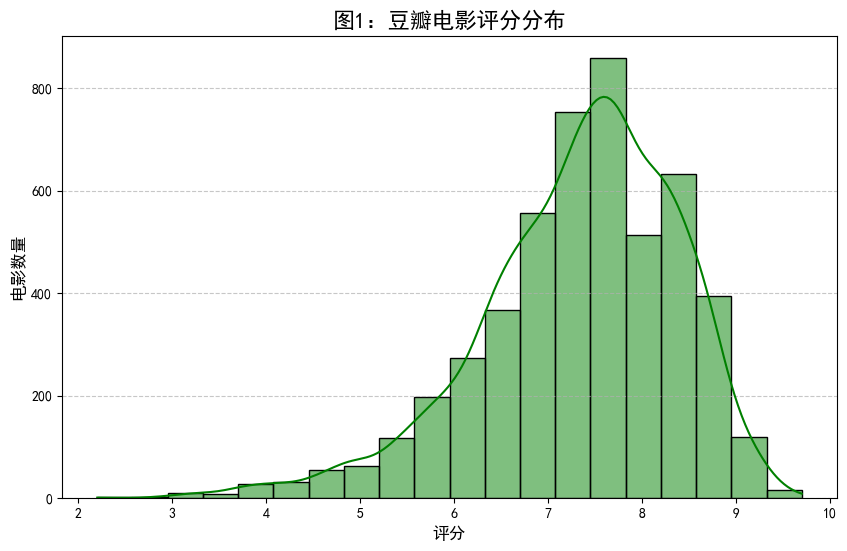

In [44]:
# 绘制评分分布直方图
plt.figure(figsize=(10, 6))
sns.histplot(df['评分'], bins=20, kde=True, color='green')
plt.title('图1：豆瓣电影评分分布', fontsize=16)
plt.xlabel('评分', fontsize=12)
plt.ylabel('电影数量', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

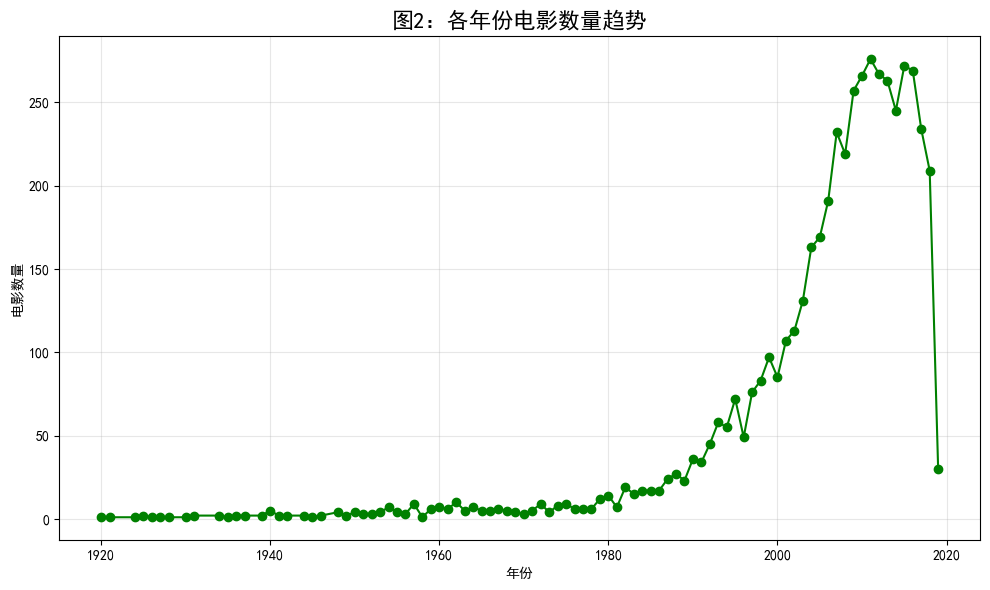

In [46]:
df['年份'] = pd.to_datetime(df['上映日期'].str.extract(r'(\d{4})')[0], errors='coerce').dt.year
year_count = df['年份'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(year_count.index, year_count.values, marker='o', linestyle='-', color='green')
plt.title("图2：各年份电影数量趋势", fontsize=16)
plt.xlabel("年份")
plt.ylabel("电影数量")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


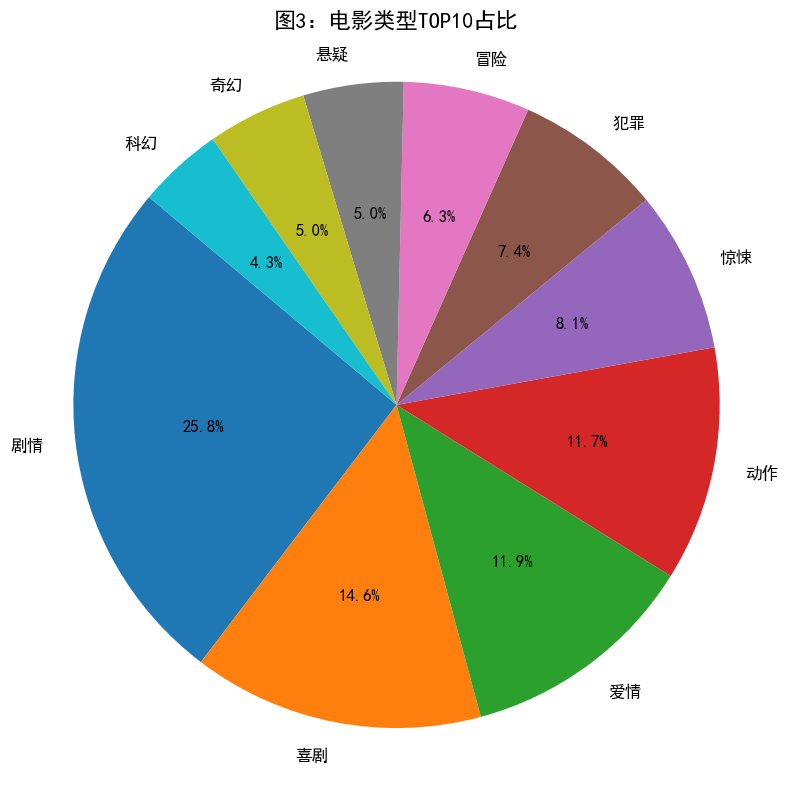

In [47]:
types = df['类型'].dropna().str.split('/').sum()
type_counter = Counter(types)
top_types = type_counter.most_common(10)

labels = [x[0] for x in top_types]
sizes = [x[1] for x in top_types]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.title("图3：电影类型TOP10占比", fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

D:\Anaconda3-2024.02-1-Windows-x86\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


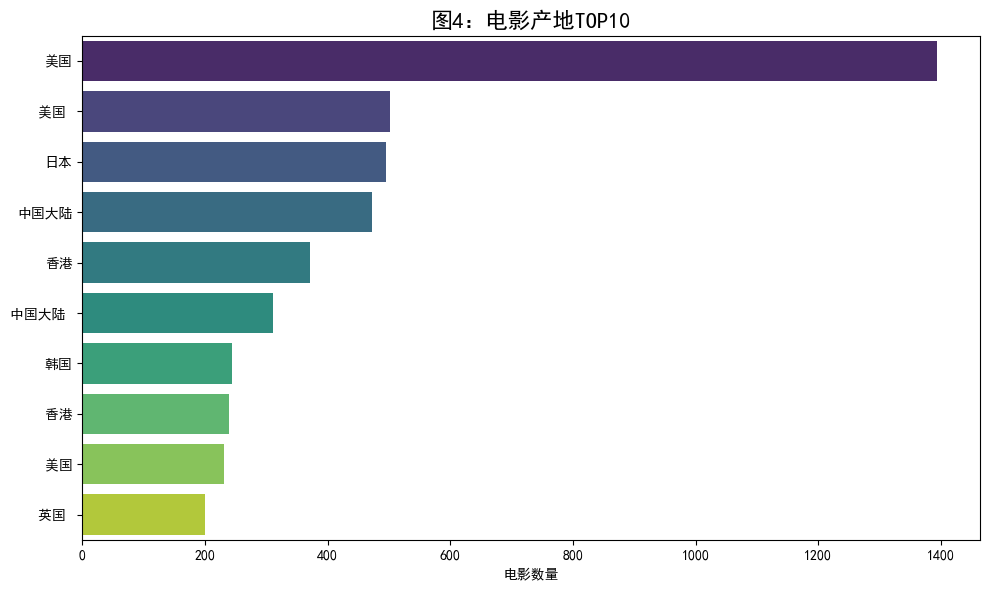

In [48]:
areas = df['制片国家/地区'].dropna().str.split('/').sum()
area_count = Counter(areas).most_common(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=[x[1] for x in area_count], y=[x[0] for x in area_count], palette='viridis')
plt.title("图4：电影产地TOP10", fontsize=16)
plt.xlabel("电影数量")
plt.tight_layout()
plt.show()


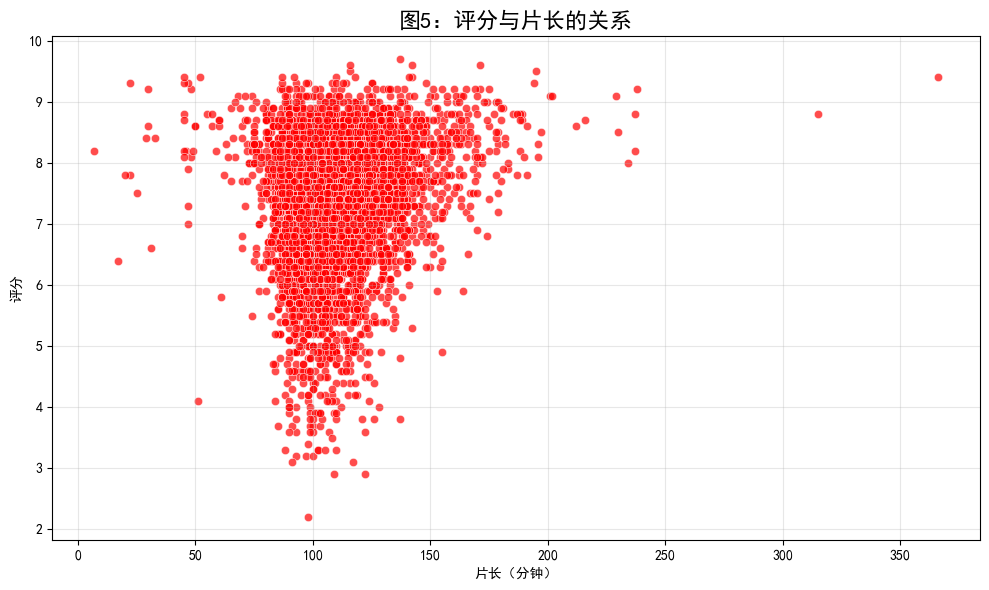

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='片长', y='评分', data=df, alpha=0.7, color='red')
plt.title("图5：评分与片长的关系", fontsize=16)
plt.xlabel("片长（分钟）")
plt.ylabel("评分")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

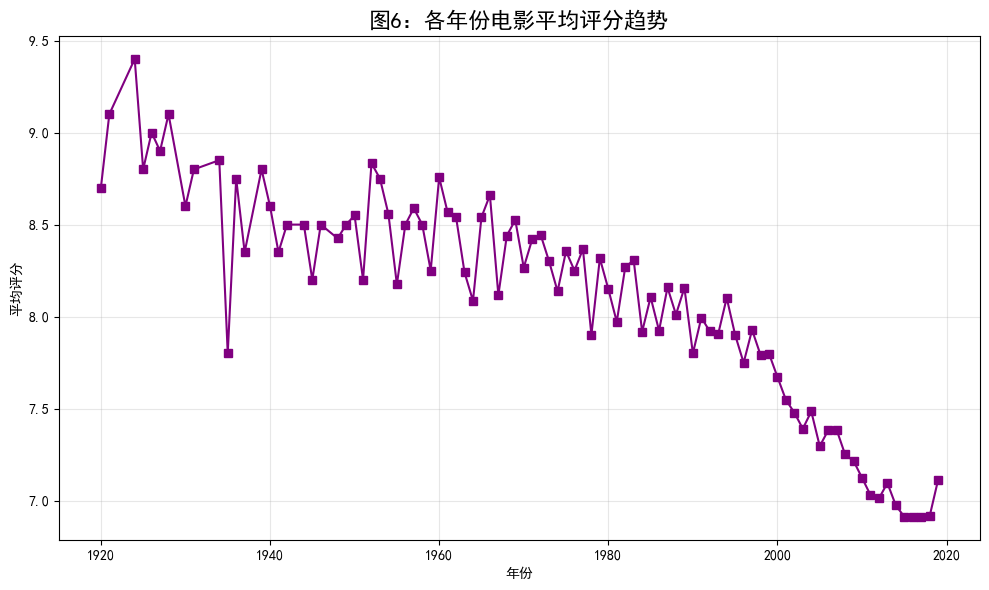

In [52]:
avg_score = df.groupby('年份')['评分'].mean().dropna()

plt.figure(figsize=(10, 6))
plt.plot(avg_score.index, avg_score.values, marker='s', linestyle='-', color='purple')
plt.title("图6：各年份电影平均评分趋势", fontsize=16)
plt.xlabel("年份")
plt.ylabel("平均评分")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [53]:
from collections import Counter
from pyecharts.charts import Bar
from pyecharts import options as opts
import pandas as pd

# 读取数据
df = pd.read_excel("movie douban.xlsx")

# 统计国家/地区出现频率
areas = df['制片国家/地区'].dropna().str.split('/').sum()
area_count = Counter(areas).most_common(10)

# 提取数据
area_names = [x[0] for x in area_count]
area_values = [x[1] for x in area_count]

# 绘制 pyecharts 柱状图
bar = (
    Bar()
    .add_xaxis(area_names)
    .add_yaxis("电影数量", area_values)
    .set_global_opts(
        title_opts=opts.TitleOpts(title="图7：电影出产地区TOP10", subtitle="数据来源：豆瓣电影数据集5000.xlsx"),
        xaxis_opts=opts.AxisOpts(name="地区"),
        yaxis_opts=opts.AxisOpts(name="数量"),
        toolbox_opts=opts.ToolboxOpts(),  
        datazoom_opts=[opts.DataZoomOpts()],  
    )
)

bar.render("movie_area_bar.html") 

'C:\\Users\\86155\\movie_area_bar.html'